In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("/content/e_food_restaurants_reviews_thessaly.csv")
df.head()

,Description,GroundTruth,Ratings,Review Date,Review Title,Site
0,I visit this place with my friends. It was ver...,positive,5,1-Mar-20,The Best Italian Food in Larissa,NaN
1,It deserves every star given in Trip Advisor. ...,positive,5,9-Jan-20,Excellent,NaN
2,Great good and value for money. A must visit i...,positive,5,20-Dec-19,Great good!,NaN
3,We went with friends. We took seats in the gar...,positive,5,7-Jun-19,"Delicious food, excellent service",NaN
4,Beautiful and cosy place ! Delicious and big p...,positive,5,6-Mar-19,Excellent !,NaN


In [4]:
df = df.drop(["Site", "Review Date", "Review Title", "Ratings"], axis=1)

In [5]:
print(df)

                                            Description GroundTruth
0     I visit this place with my friends. It was ver...    positive
1     It deserves every star given in Trip Advisor. ...    positive
2     Great good and value for money. A must visit i...    positive
3     We went with friends. We took seats in the gar...    positive
4     Beautiful and cosy place ! Delicious and big p...    positive
...                                                 ...         ...
1035  Staff was very polite, the music and the ambie...    positive
1036  Nice place very good food, fast service good p...    positive
1037  We were about 20 people and they didn't have a...    positive
1038  Everything said in the title :)\nWe came to Tr...    positive
1039  Went here for dinner. the server was excellent...    positive

[1040 rows x 2 columns]


In [6]:
df.describe()

,Description,GroundTruth
count,1040,1040
unique,481,2
top,Great place to visit and taste high gastronomy...,positive
freq,8,950


In [7]:
df = df.rename(columns={"GroundTruth": "Rating", "Description" : "Review"})

In [8]:
df['Rating'].value_counts()

positive    950
negative     90
Name: Rating, dtype: int64

In [9]:
train_reviews, test_reviews, train_sentiments, test_sentiments = train_test_split(df.Review, df.Rating, test_size=0.33, random_state=42)
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(696,) (696,)
(344,) (344,)


In [10]:
pip install --upgrade nltk

     |████████████████████████████████| 1.5 MB 4.3 MB/s 
     |████████████████████████████████| 748 kB 26.9 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [10]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [11]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['Review']=df['Review'].apply(denoise_text)

In [12]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['Review']=df['Review'].apply(remove_special_characters)

In [13]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['Review']=df['Review'].apply(simple_stemmer)

In [14]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['Review']=df['Review'].apply(remove_stopwords)

{"she's", 'your', 'if', 'their', 'that', 'them', "it's", 'wouldn', 'once', 'the', "you've", 'most', 'she', 'isn', 'an', 'aren', 'as', 'by', "hasn't", 'theirs', "shan't", 'his', "didn't", 'itself', "should've", "won't", 'few', 'myself', 'they', 'into', "don't", 'what', 'why', 'about', 'where', 'her', 'under', "couldn't", 'has', "aren't", 'for', 'some', 'all', 'over', 'can', 'nor', 't', 'because', 'very', 'you', 'whom', 'through', 'm', 'after', 'was', "shouldn't", "that'll", 'were', 'any', 'yours', "you'll", 'which', 'only', 'been', 'doesn', 'yourselves', 'from', 'had', 'my', 'each', 'being', 'just', "wouldn't", 'against', 'hers', 'do', "needn't", 'didn', 's', 'will', 'between', 'doing', 'me', 'our', 'than', 'mightn', 'but', 'did', "you'd", 've', 'both', 'll', 'its', 'to', 'now', 'hadn', 'd', "mightn't", 'more', "wasn't", 'have', 'down', 'this', 'not', 'hasn', 'herself', 'wasn', 'yourself', 'of', 'it', 'up', 'be', 'couldn', 'him', 'so', 'weren', 'own', 'there', 'and', 'with', 'don', 'our

In [15]:
#normalized train reviews
norm_train_reviews=train_reviews
norm_train_reviews[0]
#convert dataframe to string
#norm_train_string=norm_train_reviews.to_string()
#Spelling correction using Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()
#Tokenization using Textblob
#norm_train_words=norm_train_spelling.words
#norm_train_words

'I visit this place with my friends. It was very nice restaurant with  special italian food and the service exellent.'

In [16]:
#Normalized test reviews
norm_test_reviews=test_reviews
norm_test_reviews[31]
##convert dataframe to string
#norm_test_string=norm_test_reviews.to_string()
#spelling correction using Textblob
#norm_test_spelling=TextBlob(norm_test_string)
#print(norm_test_spelling.correct())
#Tokenization using Textblob
#norm_test_words=norm_test_spelling.words
#norm_test_words

'I come there with a friend for lunch, I took a dish of carbonara, while he took a "Fiorentina" meat. Both dishes were very tasty, and also the staff was very kind. I will return there!'

# a. VANDER knowledge based unsupervised model

In [17]:
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
#reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
#reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
df["sentiments"] = df["Review"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

In [19]:
# add number of characters column
df["nb_chars"] = df["Review"].apply(lambda x: len(x))


# add number of words column
df["nb_words"] = df["Review"].apply(lambda x: len(x.split(" ")))

# b. Apply TFIDF (term frequency, inverse document frequency) vectorization to reviews dataset

In [20]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df["Review"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

In [21]:
df.head()

,Review,Rating,neg,neu,pos,compound,nb_chars,nb_words,word_10,word_20,word_abov,word_absolut,word_advisor,word_afford,word_ago,word_akamatra,word_almost,word_along,word_also,word_although,word_alway,word_amaz,word_ambianc,word_amor,word_andmor,word_ani,word_antoni,word_anyon,word_appet,word_area,word_aremor,word_around,word_ask,word_ate,word_atmospher,word_attent,word_authent,word_avail,word_averag,word_away,...,word_total,word_town,word_tradit,word_treat,word_tri,word_trikala,word_trip,word_truffl,word_two,word_typic,word_uniqu,word_us,word_use,word_usmor,word_valu,word_varieti,word_vegetarian,word_veri,word_view,word_villag,word_visit,word_wa,word_wait,word_waiter,word_waitress,word_want,word_warm,word_way,word_week,word_welcom,word_well,word_went,word_wide,word_wine,word_withoutmor,word_wonder,word_work,word_worth,word_would,word_year
0,visit thi place friend wa veri nice restaur sp...,positive,0.0,0.535,0.465,0.8271,76,13,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.172086,0.0,0.0,0.278273,0.182338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,deserv everi star given trip advisor delici pl...,positive,0.0,1.000,0.000,0.0000,122,19,0.0,0.0,0.0,0.0,0.358801,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.316964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,great good valu money must visit larissa also ...,positive,0.0,0.667,0.333,0.7906,95,16,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.271165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.381111,0.0,0.0,0.150320,0.0,0.0,0.243075,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,went friend took seat garden nice set comfort ...,positive,0.0,0.694,0.306,0.8750,179,29,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.118420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,beauti cosi place delici big portion congratul...,positive,0.0,0.815,0.185,0.3612,73,12,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df.shape

(1040, 403)

In [23]:
df.Rating = df.Rating.replace({"positive":1,"negative":0})

In [24]:
df.head()

,Review,Rating,neg,neu,pos,compound,nb_chars,nb_words,word_10,word_20,word_abov,word_absolut,word_advisor,word_afford,word_ago,word_akamatra,word_almost,word_along,word_also,word_although,word_alway,word_amaz,word_ambianc,word_amor,word_andmor,word_ani,word_antoni,word_anyon,word_appet,word_area,word_aremor,word_around,word_ask,word_ate,word_atmospher,word_attent,word_authent,word_avail,word_averag,word_away,...,word_total,word_town,word_tradit,word_treat,word_tri,word_trikala,word_trip,word_truffl,word_two,word_typic,word_uniqu,word_us,word_use,word_usmor,word_valu,word_varieti,word_vegetarian,word_veri,word_view,word_villag,word_visit,word_wa,word_wait,word_waiter,word_waitress,word_want,word_warm,word_way,word_week,word_welcom,word_well,word_went,word_wide,word_wine,word_withoutmor,word_wonder,word_work,word_worth,word_would,word_year
0,visit thi place friend wa veri nice restaur sp...,1,0.0,0.535,0.465,0.8271,76,13,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.172086,0.0,0.0,0.278273,0.182338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,deserv everi star given trip advisor delici pl...,1,0.0,1.000,0.000,0.0000,122,19,0.0,0.0,0.0,0.0,0.358801,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.316964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,great good valu money must visit larissa also ...,1,0.0,0.667,0.333,0.7906,95,16,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.271165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.381111,0.0,0.0,0.150320,0.0,0.0,0.243075,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,went friend took seat garden nice set comfort ...,1,0.0,0.694,0.306,0.8750,179,29,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.118420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,beauti cosi place delici big portion congratul...,1,0.0,0.815,0.185,0.3612,73,12,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X = log_X = df.iloc[:, 8:]
X

,word_10,word_20,word_abov,word_absolut,word_advisor,word_afford,word_ago,word_akamatra,word_almost,word_along,word_also,word_although,word_alway,word_amaz,word_ambianc,word_amor,word_andmor,word_ani,word_antoni,word_anyon,word_appet,word_area,word_aremor,word_around,word_ask,word_ate,word_atmospher,word_attent,word_authent,word_avail,word_averag,word_away,word_awesom,word_back,word_bar,word_beauti,word_becaus,word_beer,word_befor,word_best,...,word_total,word_town,word_tradit,word_treat,word_tri,word_trikala,word_trip,word_truffl,word_two,word_typic,word_uniqu,word_us,word_use,word_usmor,word_valu,word_varieti,word_vegetarian,word_veri,word_view,word_villag,word_visit,word_wa,word_wait,word_waiter,word_waitress,word_want,word_warm,word_way,word_week,word_welcom,word_well,word_went,word_wide,word_wine,word_withoutmor,word_wonder,word_work,word_worth,word_would,word_year
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.172086,0.0,0.000000,0.278273,0.182338,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.358801,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.316964,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.271165,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.381111,0.0,0.0,0.150320,0.0,0.000000,0.243075,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.118420,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.250885,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.372098,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.278579,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.267525,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.248635,0.0,0.0,0.196137,0.0,0.000000,0.000000,0.207821,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1036,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000

In [26]:
y = df.Rating
y

0       1
1       1
2       1
3       1
4       1
       ..
1035    1
1036    1
1037    1
1038    1
1039    1
Name: Rating, Length: 1040, dtype: int64

In [27]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Apply the following ML algorithms to the vectorized dataset:


## i. LogisticRegression

In [ ]:
lr = LogisticRegression(penalty="l2",C=0.1,solver='lbfgs')

In [ ]:
scores_lr = cross_val_score(lr, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores_lr), np.std(scores_lr)))

Accuracy: 0.913 (0.018)


## ii. KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_scores = []
k_range = range(1, 21)

for K in k_range:
    model_knn = KNeighborsClassifier(n_neighbors = K, metric = 'minkowski', p = 2)

    scores = cross_val_score(model_knn, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    k_scores.append(scores.mean())

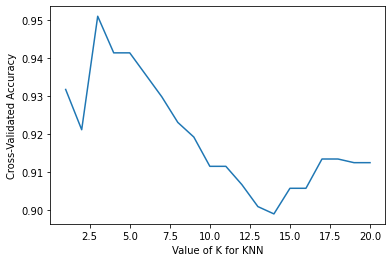

In [ ]:
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

From the accuracy we observe that the best value is at K=3

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

In [ ]:
scores_knn = cross_val_score(model_knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores_knn), np.std(scores_knn)))

Accuracy: 0.951 (0.017)


## iii. RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
k_scores = []
k_range = [5,10,15,20,25,30,35,40]
for K in k_range:
    
    model_rf = RandomForestClassifier(n_estimators=K)

    scores = cross_val_score(model_rf, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    k_scores.append(scores.mean())

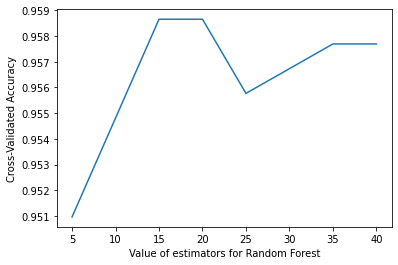

In [ ]:
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of estimators for Random Forest')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

We observe that for k=15-20 estimators our accuracy is the best.

In [ ]:
model_rf=RandomForestClassifier(n_estimators=17)

In [ ]:
scores_rf = cross_val_score(model_rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores_rf), np.std(scores_rf)))

Accuracy: 0.958 (0.023)


## iv. GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
scores_nb = cross_val_score(nb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores_nb), np.std(scores_nb)))

Accuracy: 0.892 (0.021)


## v. SVC

In [ ]:
from sklearn import svm

In [ ]:
model_svc = svm.SVC() # Rbf Kernel

In [ ]:
scores_svc = cross_val_score(model_svc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores_svc), np.std(scores_svc)))

Accuracy: 0.958 (0.023)


## vi. Long Short-Term Memory (LSTM) – Keras Implementation

In [ ]:
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1
batch_size = 32
verbosity = 1
no_epochs = 5
acc_per_fold = []
loss_per_fold = []
for train, test in cv.split(X.values, y.values):
  X1 = X.values
  y1 = y.values

  model = Sequential()
  model.add(Embedding(728, 120, input_length = X.shape[1]))
  model.add(SpatialDropout1D(0.4))
  model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(1,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
  print(model.summary())

    # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(X1[train], y1[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(X1[test], y1[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 395, 120)          87360     
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 395, 120)         0         
 lDropout1D)                                                     
                                                                 
 lstm_5 (LSTM)               (None, 176)               209088    
                                                                 
 dense_5 (Dense)             (None, 1)                 177       
                                                                 
Total params: 296,625
Trainable params: 296,625
Non-trainable params: 0
_________________________________________________________________
None
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
30

## vii. AutoSklearnClassifier (from autosklearn.classification import AutoSklearnClassifier)

In [1]:
from autosklearn.classification import AutoSklearnClassifier

In [31]:
!pip install auto-sklearn

     |████████████████████████████████| 6.3 MB 3.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 1.0 MB 62.4 MB/s 
     |████████████████████████████████| 822 kB 67.5 MB/s 
     |████████████████████████████████| 4.2 MB 41.2 MB/s 
     |████████████████████████████████| 4.0 MB 33.3 MB/s 
     |████████████████████████████████| 208 kB 51.0 MB/s 
     |████████████████████████████████| 596 kB 52.0 MB/s 
     |████████████████████████████████| 133 kB 54.5 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.3-py3-none-any.whl size=6586730 sha256=4a4f386e38688ab3d708fb2d8b48f63aa83abb15e2f5804407c83bc27acf9a2a
  Stored in directory: /root/.cache/pip/wheels/28/df/95/a197368c9745885b878f69ae3d6aec0941ccc28e5e1ce585d4
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7043 sha256=b9c5d

In [33]:
pip install --upgrade scipy==1.7.3

In [28]:
model_auto = AutoSklearnClassifier()

In [29]:
scores_auto = cross_val_score(model_auto, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [30]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores_auto), np.std(scores_auto)))

Accuracy: 0.957 (0.020)


## viii. Xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(max_depth=6,n_estimators=1000)

In [ ]:
scores_xgb = cross_val_score(xgb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores_xgb), np.std(scores_xgb)))

Accuracy: 0.958 (0.018)
